In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import torch

import os
if "ntbk" in os.getcwd():
    os.chdir("..")
print(os.getcwd())

import sys
sys.path.append(os.path.join(os.getcwd(), "otgnn"))
sys.path.append(os.path.join(os.getcwd(), "molgen"))
sys.path.append(os.path.join(os.getcwd(), "iclr19-graph2graph/props"))

from molgen.Discretizer.sinkhorn import sinkhorn_knopp

/home/octav/gitrepos/tum-thesis


In [15]:
M_init = torch.Tensor(np.array([[0,0,1,0,0],[0,0,1,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,1,0,0,0]]))

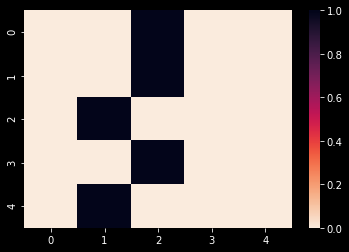

In [16]:
def hmap(dfr):
    sns.heatmap(dfr.cpu().detach().numpy(), cmap = sns.color_palette("rocket_r", as_cmap=True))
    plt.show()
    
hmap(M_init)

In [17]:
M = M_init/(len(M_init))

W 0


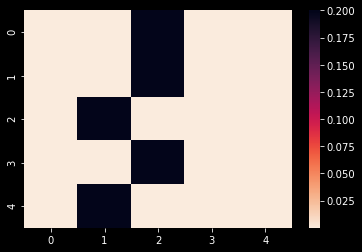

tensor([4.9999e-06, 4.0000e-01, 5.9999e-01, 4.9999e-06, 4.9999e-06])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

W 1


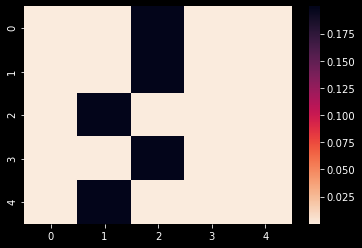

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1867, 0.1867, 0.2200, 0.1867, 0.2200])

W 2


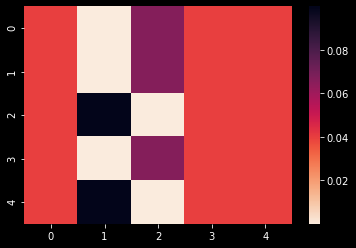

tensor([0.2013, 0.1818, 0.2143, 0.2013, 0.2013])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

W 3


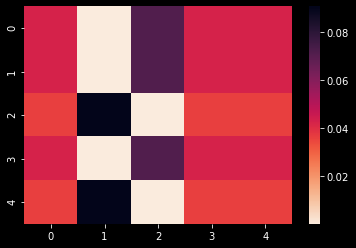

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1944, 0.1944, 0.2084, 0.1944, 0.2084])

W 4


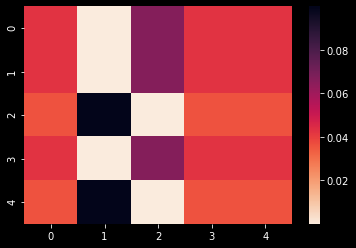

tensor([0.2008, 0.1920, 0.2058, 0.2008, 0.2008])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

W 5


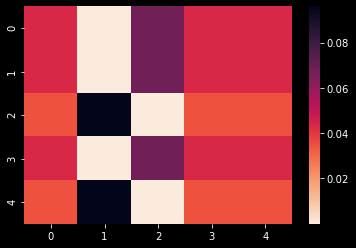

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1976, 0.1976, 0.2036, 0.1976, 0.2036])

W 6


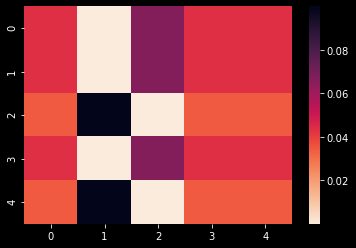

tensor([0.2004, 0.1964, 0.2024, 0.2004, 0.2004])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

W 7


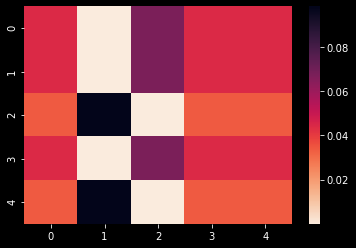

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1989, 0.1989, 0.2016, 0.1989, 0.2016])

W 8


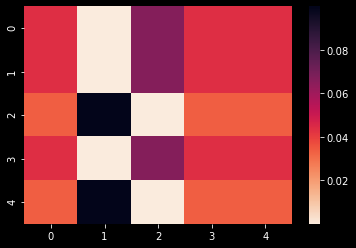

tensor([0.2002, 0.1984, 0.2011, 0.2002, 0.2002])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])

W 9


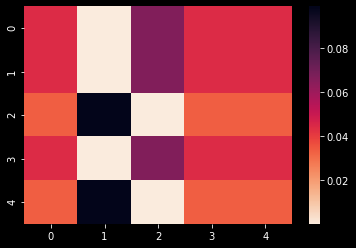

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1995, 0.1995, 0.2007, 0.1995, 0.2007])



In [25]:
# pick your method of computation

# homemade way
dim = 0
eps = 1e-6
W = M + eps

for idx2 in range(10):
    print ("W",idx2)
    hmap(W)
    dim = 1 - dim
    W = (W.transpose(0,dim) / W.sum(axis = dim)).transpose(0,dim)
    W = W/(len(W))
    
    print (W.sum(axis = 0))
    print (W.sum(axis = 1))
    print ()
        

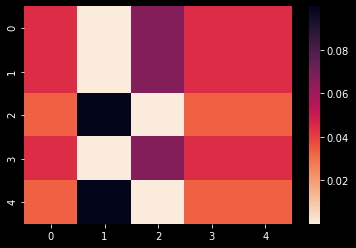

In [57]:
W1 = sinkhorn_knopp(M, -0.1)
hmap(W1)


In [40]:
print(W1.sum(axis = 0))
print(W1.sum(axis = 1))

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])


In [43]:
print(W.sum(axis = 0))
print(W.sum(axis = 1))

tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor([0.1995, 0.1995, 0.2007, 0.1995, 0.2007])


In [56]:
np.linalg.norm(W - W1)

0.25818107